In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv('/Users/SamuelLP/Desktop/git/Challenge_Nexialog/data/data_variables_metiers.csv', sep=',')
data["date_mensuelle"] = pd.to_datetime(data["date_mensuelle"])
data.head()

SK_ID_CURR  TARGET date_mensuelle NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  \
0      341177       1     2013-01-01         Cash loans           99000.0   
1      410860       0     2013-01-01         Cash loans          157500.0   
2      125382       0     2013-01-01         Cash loans           76500.0   
3      416718       0     2013-01-01         Cash loans          157500.0   
4      280621       0     2013-01-01         Cash loans           90000.0   

   AMT_CREDIT_x  AMT_ANNUITY NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0      354276.0      28120.5          Working  Secondary / secondary special   
1      225000.0       9909.0        Pensioner               Higher education   
2      808650.0      23773.5        Pensioner  Secondary / secondary special   
3      315000.0      11673.0          Working  Secondary / secondary special   
4     1078200.0      31522.5          Working  Secondary / secondary special   

  NAME_FAMILY_STATUS  ... AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0     Civil marriage  ...   52490.250000             0.000000   
1            Married  ...  153699.367500          3730.875000   
2            Married  ...  192250.500000         47592.000000   
3            Married  ...  418197.310312        202930.281562   
4            Married  ...   69079.500000             0.000000   

  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0                  0.0                     0.0  Consumer credit   
1                  0.0                     0.0  Consumer credit   
2                  0.0                     0.0  Consumer credit   
3                  0.0                     0.0  Consumer credit   
4                  0.0                     0.0      Credit card   

   CNT_INSTALMENT_FUTURE  AMT_APPLICATION  AMT_CREDIT_y  NAME_CLIENT_TYPE  \
0               5.000000        65316.150    69522.3000          Repeater   
1               5.000000       167314.500   179275.5000               New   
2               6.785714       170644.500   168273.0000               New   
3               8.707692        97378.875   118605.9375          Repeater   
4               4.222222        76363.137    92751.3000          Repeater   

    AMT_PAYMENT  
0   4164.552692  
1  19716.777000  
2  12352.523824  
3  27195.907846  
4   5820.422344  

[5 rows x 25 columns]

## Traitement des NaN

In [34]:
# catégorielles
for col in data.select_dtypes(include = "object").columns.tolist():
    if data[col].isna().sum()/data.shape[0] > 0.35: data.dropna(subset=[col], inplace=True)
    else: data.fillna({col: data[col].mode()[0]}, inplace=True)

# numériques
for col in data.select_dtypes(include = np.number).columns.tolist():
    if data[col].isna().sum()/data.shape[0] > 0.35: data.dropna(subset=[col], inplace=True)
    else: data.fillna({col: data[col].median()}, inplace=True)

## Discrétisation des variables catégorielles

In [35]:
cats = data.select_dtypes(include = "object").columns.tolist()
cats

['NAME_CONTRACT_TYPE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'CREDIT_TYPE',
 'NAME_CLIENT_TYPE']

In [36]:
# colonnes qui vont pas pouvoir être discrétisées à cause de trop de modalités
data.drop([ 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE'], axis=1, inplace=True)

In [38]:
def plot_graphes_categorielles(df, col_discrete, col_originale):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

    for idx, col in enumerate(df[[col_discrete, col_originale]].columns):
        result = df.groupby([col, 'date_mensuelle'])['TARGET'].mean().reset_index()
    
        for genre, group in result.groupby(col):
            axes[0, idx].plot(group['date_mensuelle'], group['TARGET'], label=genre)
        
        axes[0, idx].legend()
        axes[0, idx].set_xlabel('Date')
        axes[0, idx].set_ylabel('Moyenne de TARGET')
        axes[0, idx].set_title(f'Évolution de la moyenne du passage en DET par {col}')

    axes[1, 0].hist(df[col_discrete])
    axes[1, 0].set_title(f'Histogramme de la {col_discrete}')
    axes[1, 0].set_xlabel(col_discrete)
    axes[1, 0].set_ylabel('Fréquence')

    axes[1, 1].hist(df[col_originale])
    axes[1, 1].set_title(f'Histogramme de {col_originale}')
    axes[1, 1].set_xlabel(col_originale)
    axes[1, 1].set_ylabel('Fréquence')
    plt.tight_layout()
    plt.show()

### Discrétisation de NAME_INCOME_TYPE

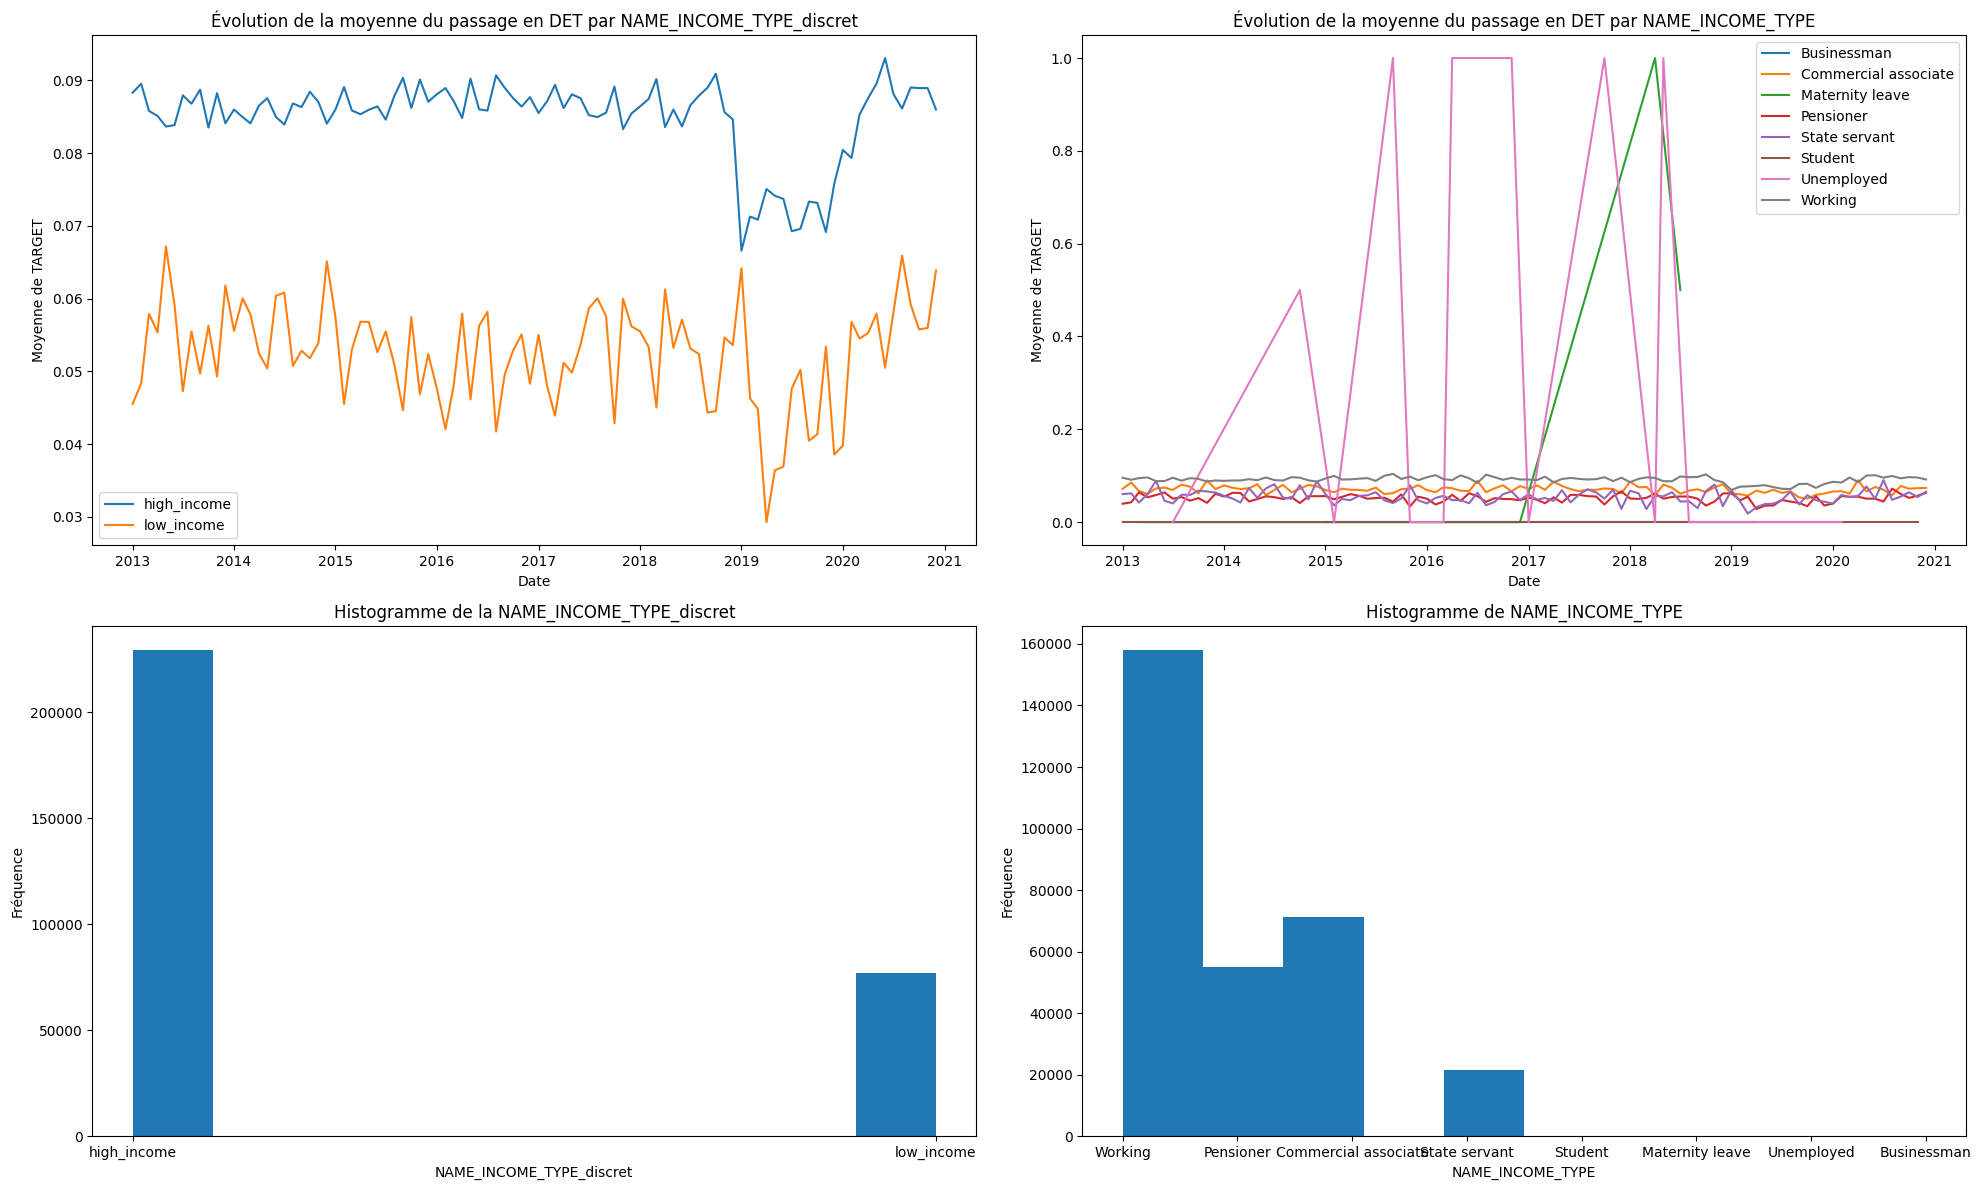

In [37]:
low_income = ['Maternity leave', 'Unemployed', 'State servant', 'Pensioner', 'Student']
high_income = ["Working", "Commercial associate", "Businessman"]

data['NAME_INCOME_TYPE_discret'] = np.select([data['NAME_INCOME_TYPE'].isin(low_income),
                                                data['NAME_INCOME_TYPE'].isin(high_income)],
                                                # data['NAME_INCOME_TYPE'].isin(other)],
                                                ['low_income', 'high_income'], #, 'other'],
                                                default='low_income')

plot_graphes_categorielles(data, "NAME_INCOME_TYPE_discret", "NAME_INCOME_TYPE")


### Discrétisation de NAME_EDUCATION_TYPE

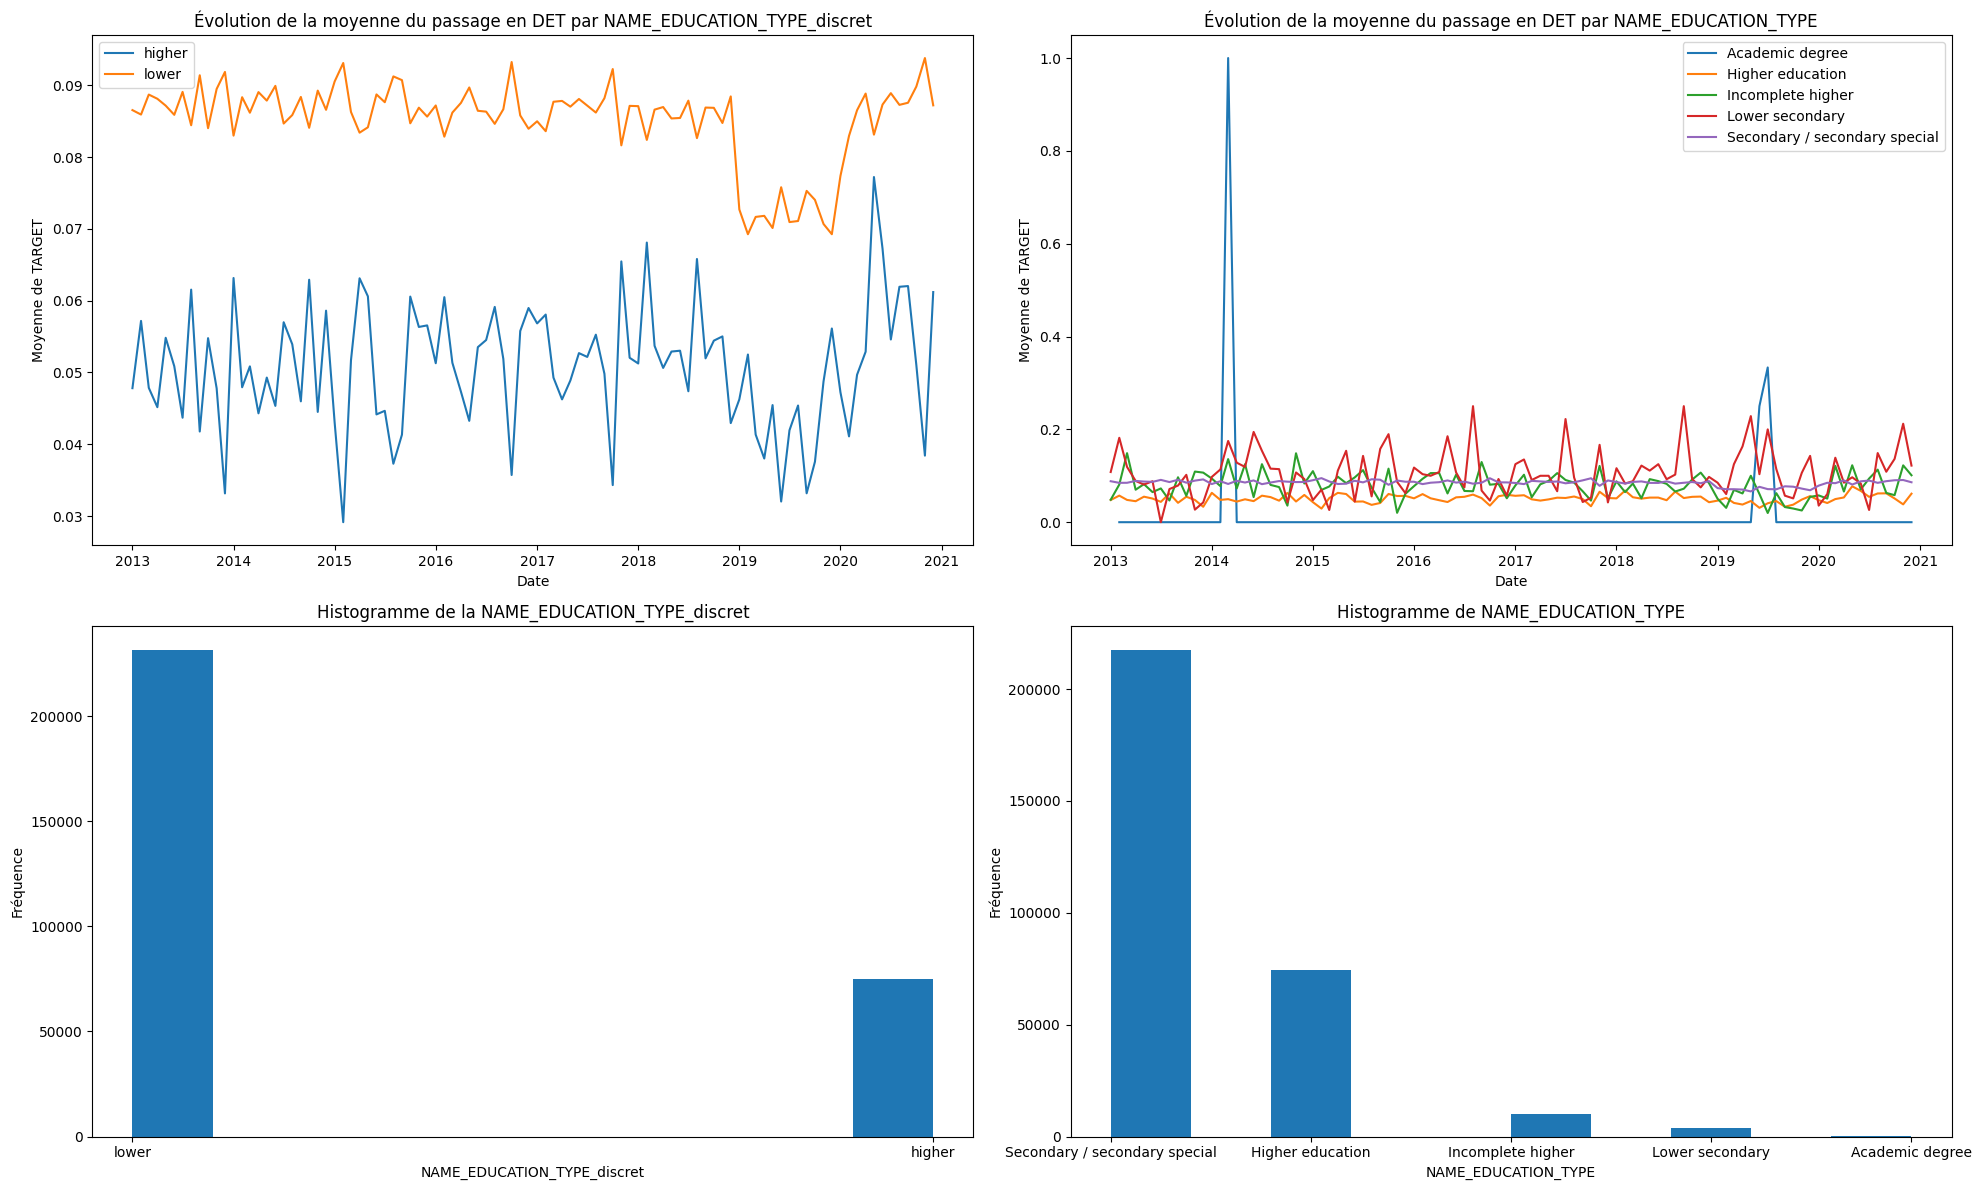

In [42]:
lower = ["Lower_education", "Secondary / secondary special", "Incomplete higher"]
higher = ["Higher education", "Academic degree"]

data['NAME_EDUCATION_TYPE_discret'] = np.select([data['NAME_EDUCATION_TYPE'].isin(lower),
                                        data['NAME_EDUCATION_TYPE'].isin(higher)],
                                        ['lower', 'higher'],
                                        default='lower')


plot_graphes_categorielles(data, col_discrete="NAME_EDUCATION_TYPE_discret", col_originale="NAME_EDUCATION_TYPE")



### Discrétisation de NAME_FAMILY_STATUS

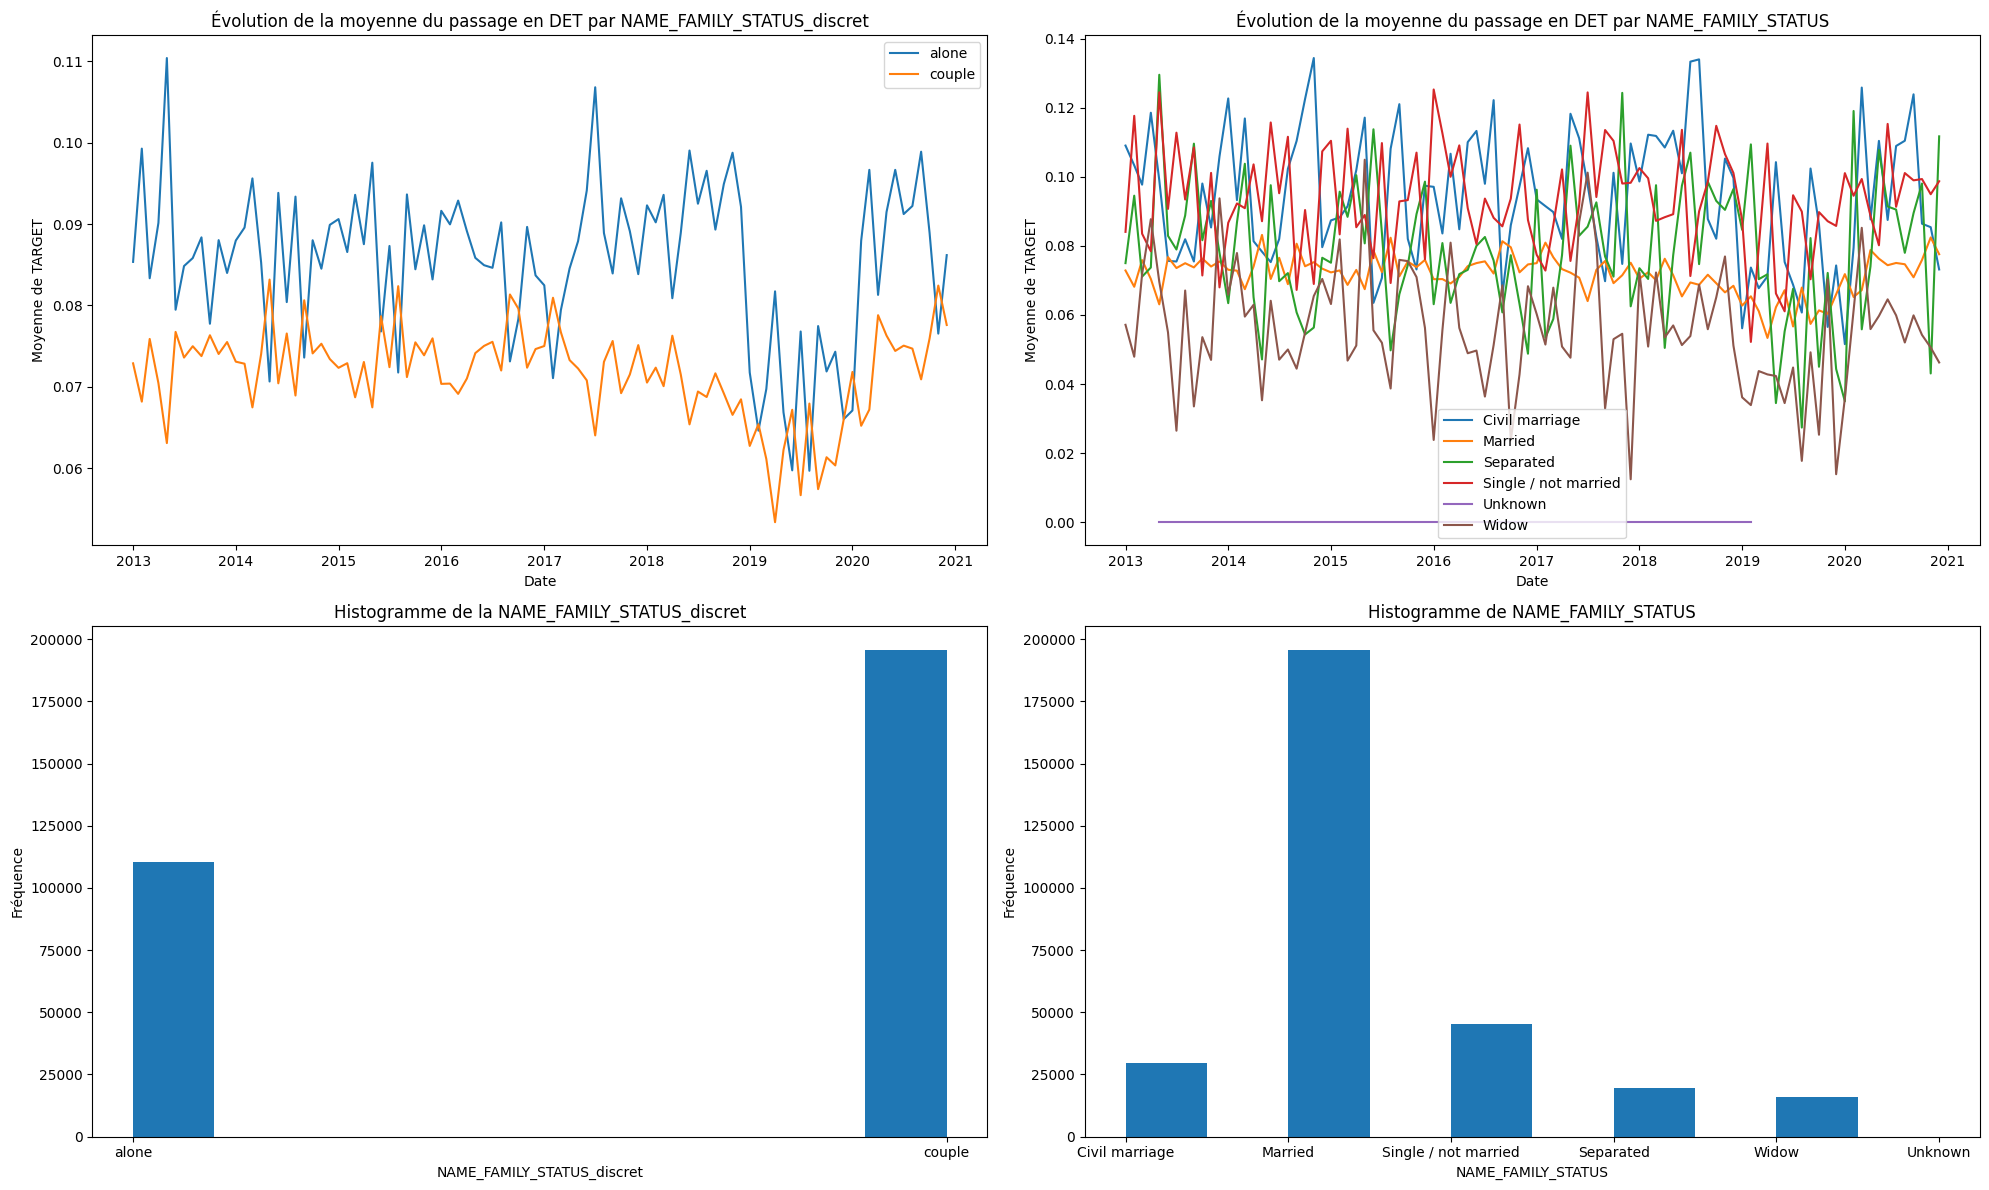

In [43]:
alone = ["Single / not married", "Separated", "Widow", "Security staff", "Laborers", "Unknown","Civil marriage"]
couple = ["Married"]

data['NAME_FAMILY_STATUS_discret'] = np.select([data['NAME_FAMILY_STATUS'].isin(alone),
                                                        data['NAME_FAMILY_STATUS'].isin(couple)],
                                                        ['alone', 'couple'],
                                                        default='couple')

plot_graphes_categorielles(data, col_discrete="NAME_FAMILY_STATUS_discret", col_originale="NAME_FAMILY_STATUS")


### Discrétisation de CREDIT_TYPE

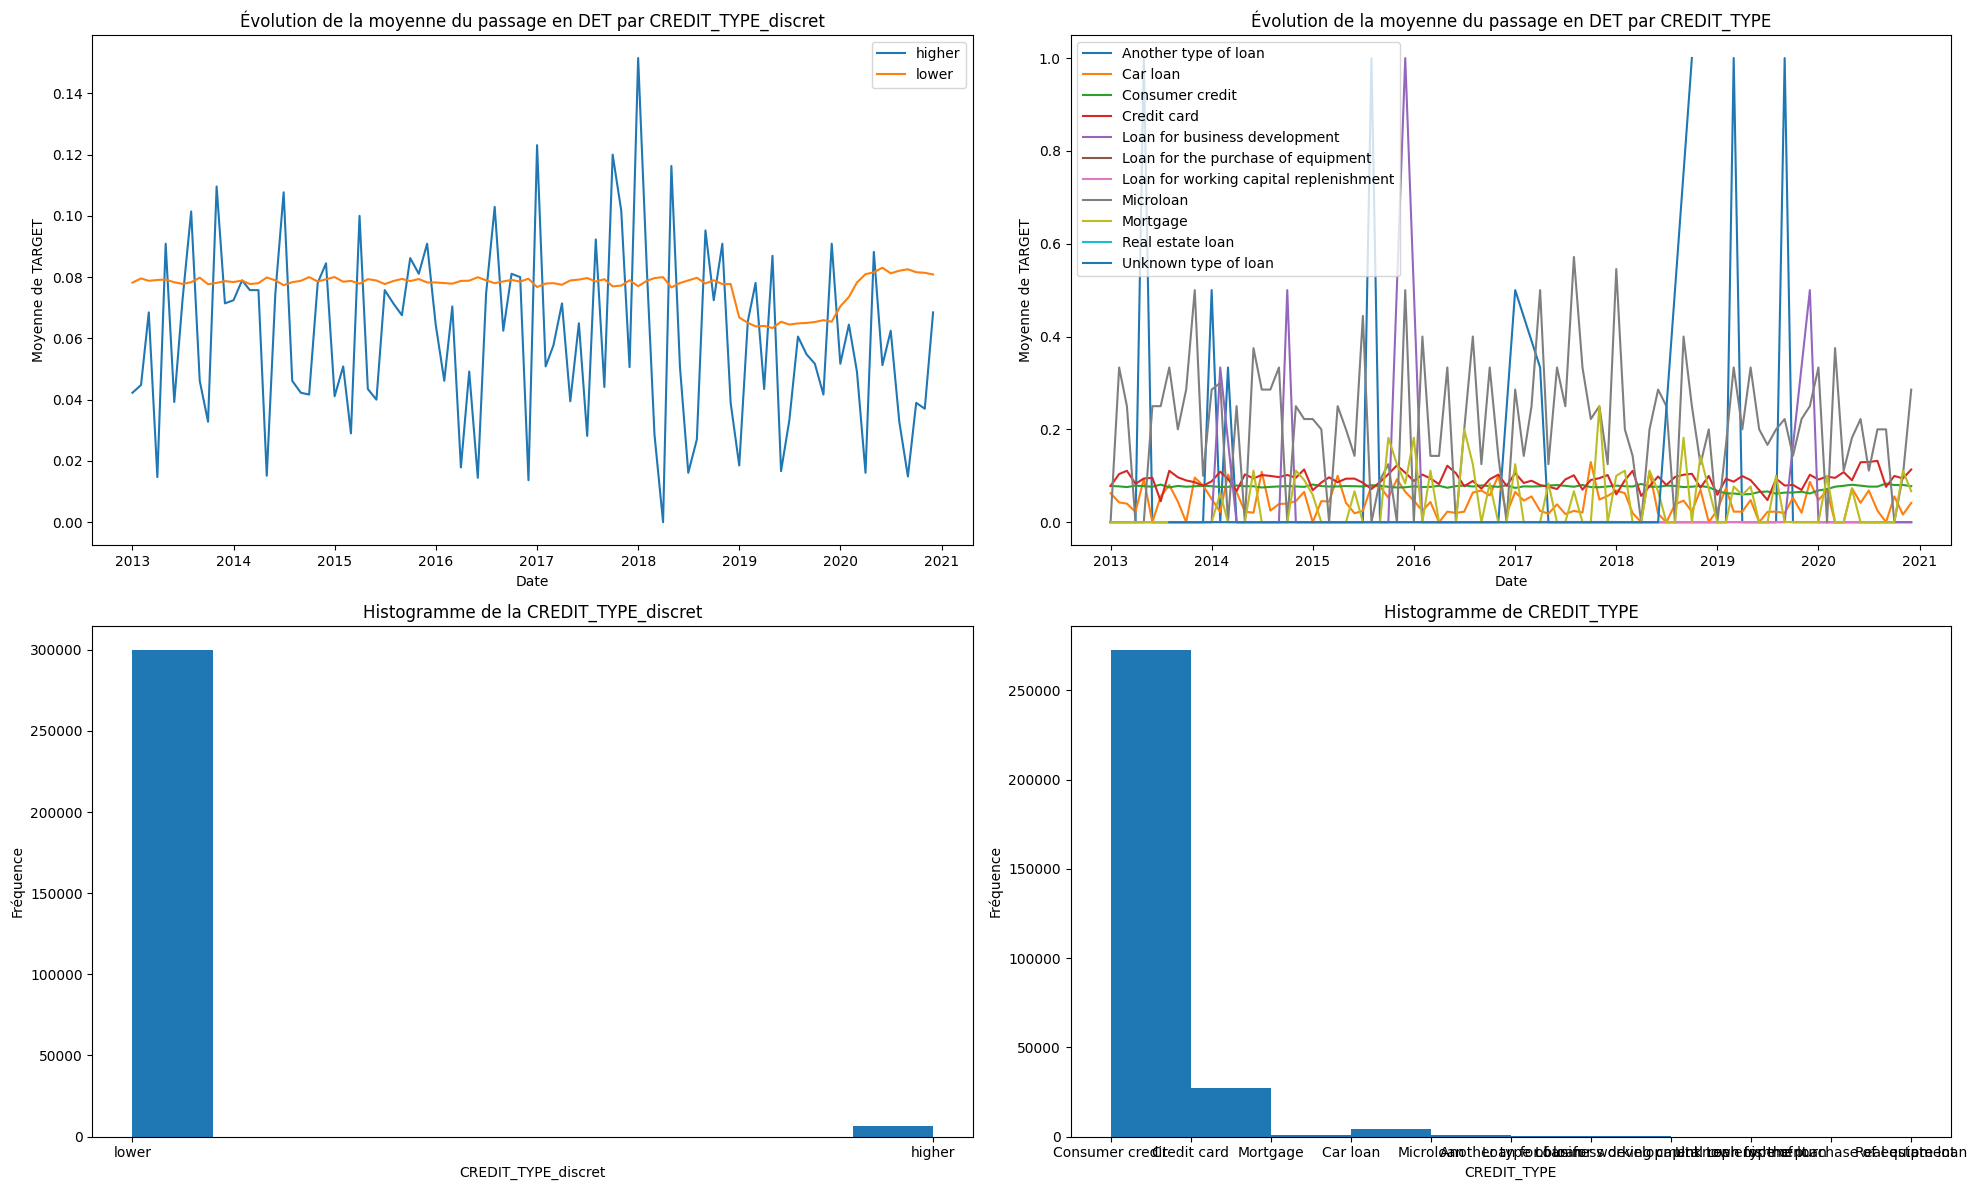

In [44]:
list_mean = []
for cat in data['CREDIT_TYPE'].unique():
    moyenne = data[data['CREDIT_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['credit'] = data['CREDIT_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)

lower = ["Consumer credit", "Credit card"]
higher = ["Car loan", "Microloan", "Loan for business development", "Loan for ", "Mortgage", "Another type of loan", "Unknown type of loan"]

data['CREDIT_TYPE_discret'] = np.select([data['CREDIT_TYPE'].isin(lower),
                                        data['CREDIT_TYPE'].isin(higher)],
                                        ['lower', 'higher'],
                                        default='lower')

plot_graphes_categorielles(data, col_discrete='CREDIT_TYPE_discret', col_originale='CREDIT_TYPE')


### Discrétisation de NAME_CLIENT_TYPE

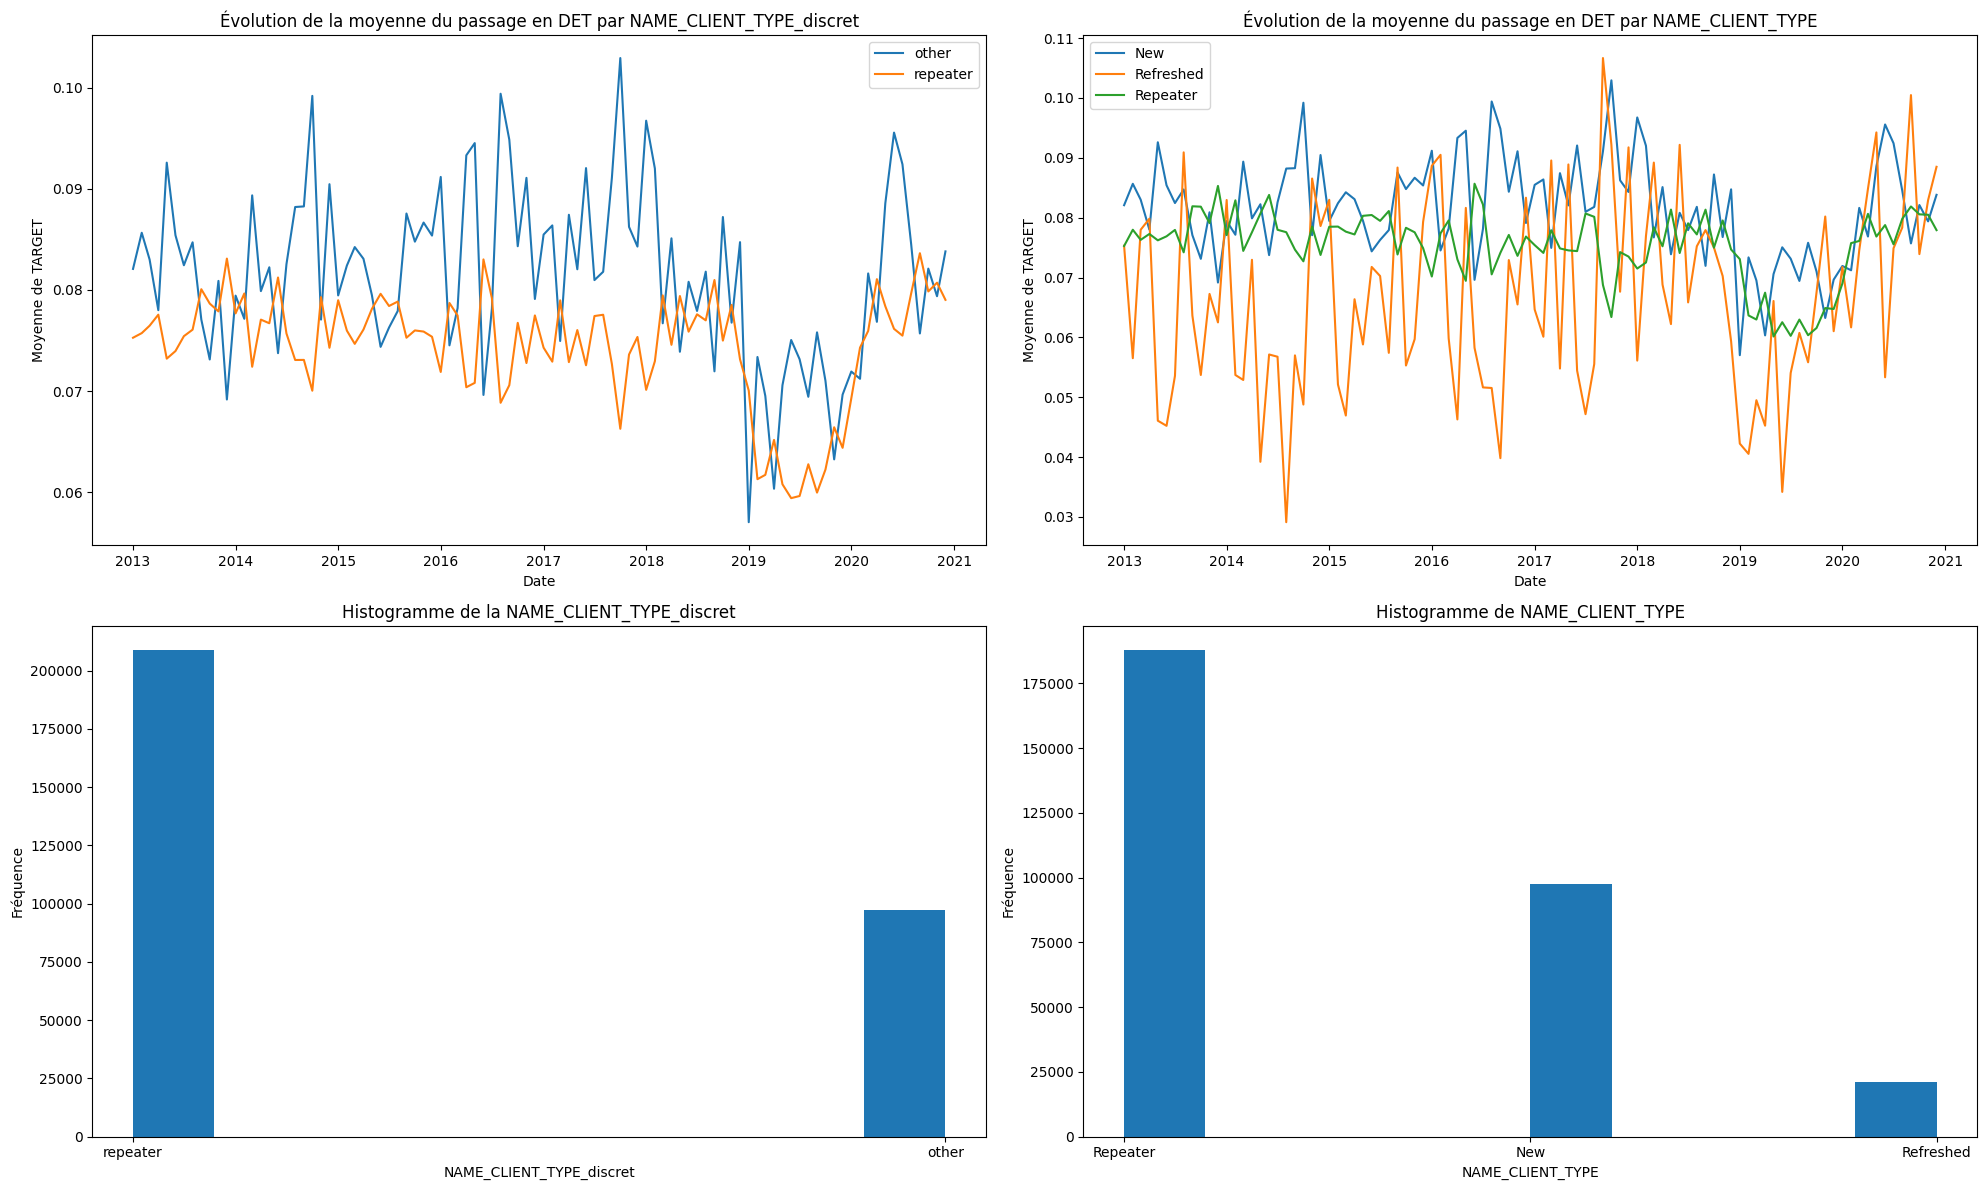

In [45]:
data["NAME_CLIENT_TYPE"] = data["NAME_CLIENT_TYPE"].replace("XNA", data["NAME_CLIENT_TYPE"].mode()[0])
list_mean = []
for cat in data['NAME_CLIENT_TYPE'].unique():
    moyenne = data[data['NAME_CLIENT_TYPE']==cat]['TARGET'].mean()
    list_mean.append(moyenne)
    
motif = pd.DataFrame(list_mean, columns=['moyenne'])
motif['credit'] = data['NAME_CLIENT_TYPE'].unique()
motif.sort_values(ascending=False, by = 'moyenne', inplace=True)
motif.dropna(inplace=True)
motif.reset_index(drop=True, inplace=True)

repeater = ["Repeater", "Refreshed"]
other = ["New"]

data['NAME_CLIENT_TYPE_discret'] = np.select([data['NAME_CLIENT_TYPE'].isin(repeater),
                                        data['NAME_CLIENT_TYPE'].isin(other)],
                                        ['repeater', 'other'],
                                        default='repeater')


plot_graphes_categorielles(data, col_discrete="NAME_CLIENT_TYPE_discret", col_originale="NAME_CLIENT_TYPE")



## On garde ici les variables intéressantes 

In [46]:
data.drop(["NAME_INCOME_TYPE", 'NAME_EDUCATION_TYPE', "NAME_FAMILY_STATUS",
           "CREDIT_TYPE", "CREDIT_TYPE_discret",
           'NAME_CLIENT_TYPE', 'NAME_CLIENT_TYPE_discret'], axis=1, inplace=True)

# Discrétisation des numériques

In [47]:
from deap import base, creator, tools, algorithms
from functools import  partial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, module="deap.creator")

In [48]:
# renommage de la colonne AMT_CREDIT_x, supression de AMT_CREDIT_y
data.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT'}, inplace=True)
data.drop("AMT_CREDIT_y", axis=1, inplace=True)

## Discrétisation en 3 bins

In [64]:
num = [ 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CNT_INSTALMENT_FUTURE',
 'AMT_APPLICATION',
 'AMT_PAYMENT']
var_to_categorize = [var for var in num if data[var].nunique() < 20]
num_final = [var for var in num if var not in var_to_categorize]

In [73]:
def selection_nb_bins(nums, NB_BINS):
    dict_vars = {}

    for var in nums:
        dict_vars[var] = NB_BINS
    return dict_vars
dict_variables = selection_nb_bins(nums=num_final, NB_BINS=2)

In [75]:
def calculate_stability(column):
    stability_df = data.groupby(['date_mensuelle', column])['TARGET'].mean().unstack()
    
    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df

In [76]:
def plot_stability(variable):
    stability_df = calculate_stability(variable)  
    plt.figure(figsize=(10, 5))
    
    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
    
    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [77]:
def evalChi2(individual, variable):
    individual_sorted = sorted(individual)
    percentiles = [max(0, min(i * 100, 100)) for i in individual_sorted]
    thresholds = np.percentile(data[variable].dropna(), percentiles)
    
    thresholds = np.unique(thresholds)
    
    disc_var = np.digitize(data[variable], thresholds)
    data['disc_var'] = disc_var
    
    contingency_table = pd.crosstab(data['disc_var'], data['TARGET'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2,

In [78]:
def Run_Genetic_Discretisation(VARIABLE, NB_CLASSES_MAX):
    NB_GEN = 5
    POP_SIZE = 100  
    CXPB, MUTPB = 0.5, 0.2  


    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    def custom_crossover(ind1, ind2):
        if len(ind1) > 1 and len(ind2) > 1:
            return tools.cxTwoPoint(ind1, ind2)
        else:
            return ind1, ind2

    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=NB_CLASSES_MAX)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", partial(evalChi2, variable=VARIABLE))
    toolbox.register("mate", custom_crossover)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=POP_SIZE)
    algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=NB_GEN, verbose=True)
    
    best_ind = tools.selBest(population, 1)[0]
    return(best_ind)

In [79]:
def plot_graphes(dict_vars):
    for variable in dict_vars : 
        print(variable)
        bins = Run_Genetic_Discretisation(variable, dict_vars[variable])
        bins_normalise = sorted([min(1, max(0, val)) for val in bins])
        
        seuils = np.percentile(data[variable].dropna(), [val * 100 for val in bins_normalise])
        seuils_uniques = np.unique(seuils)
        
        data[f'{variable}_disc'] = np.digitize(data[variable], seuils_uniques)
        
        stability_df = calculate_stability(f'{variable}_disc')  
        plt.figure(figsize=(10, 5))
        
        for class_label in stability_df.drop('stability', axis=1).columns:
            values = stability_df[class_label]
            plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')
        
        plt.title(f'Stabilité de l\'impact sur la cible pour {variable}_disc')
        plt.xlabel('Date')
        plt.ylabel('Proportion de la cible TARGET')
        plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
        plt.show()

AMT_INCOME_TOTAL
gen	nevals
0  	100   
1  	61    
2  	61    
3  	61    
4  	70    
5  	55    


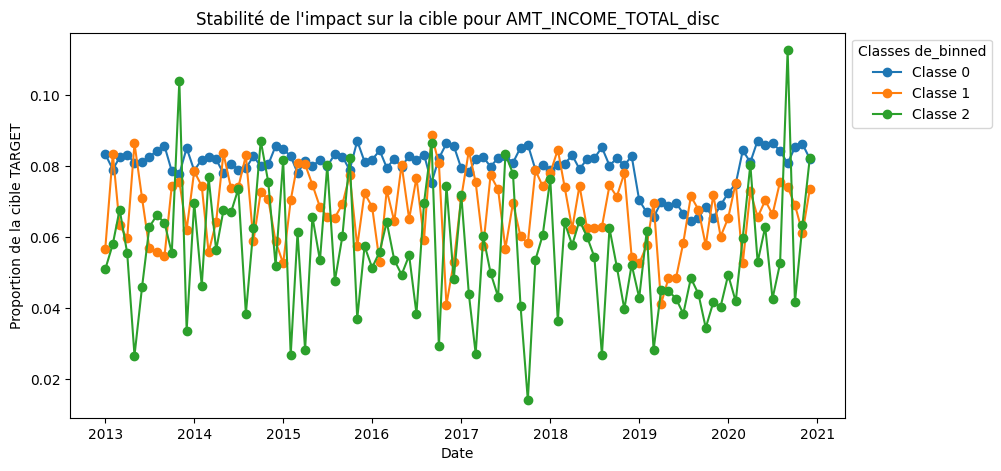

AMT_CREDIT
gen	nevals
0  	100   
1  	64    
2  	55    
3  	53    
4  	67    
5  	57    


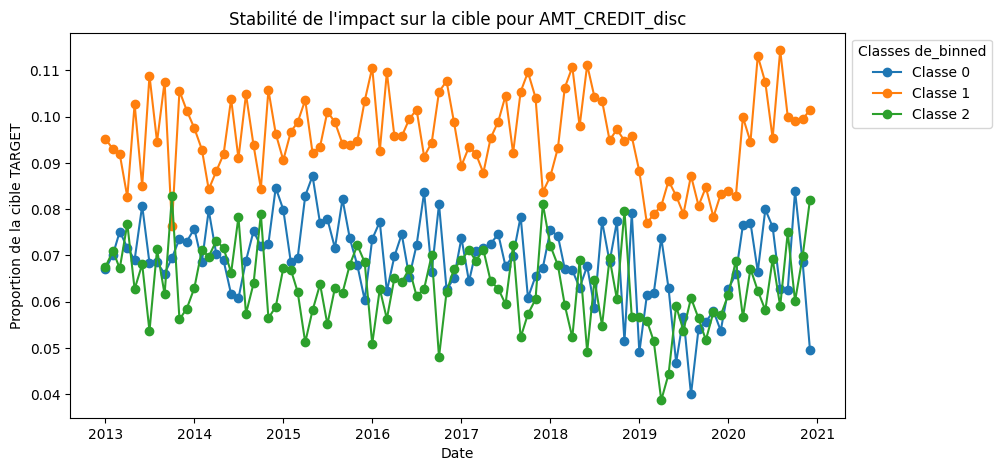

AMT_ANNUITY
gen	nevals
0  	100   
1  	53    
2  	65    
3  	58    
4  	47    
5  	68    


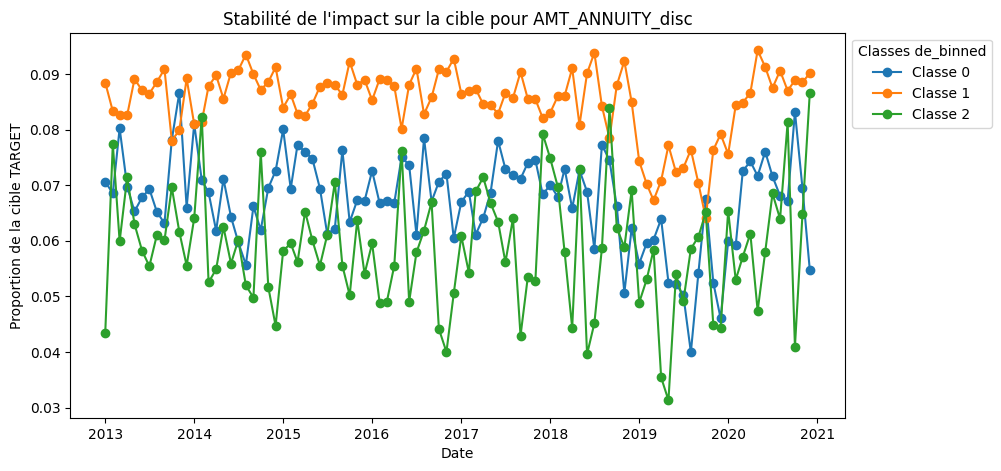

DAYS_EMPLOYED
gen	nevals
0  	100   
1  	66    
2  	59    
3  	57    
4  	64    
5  	59    


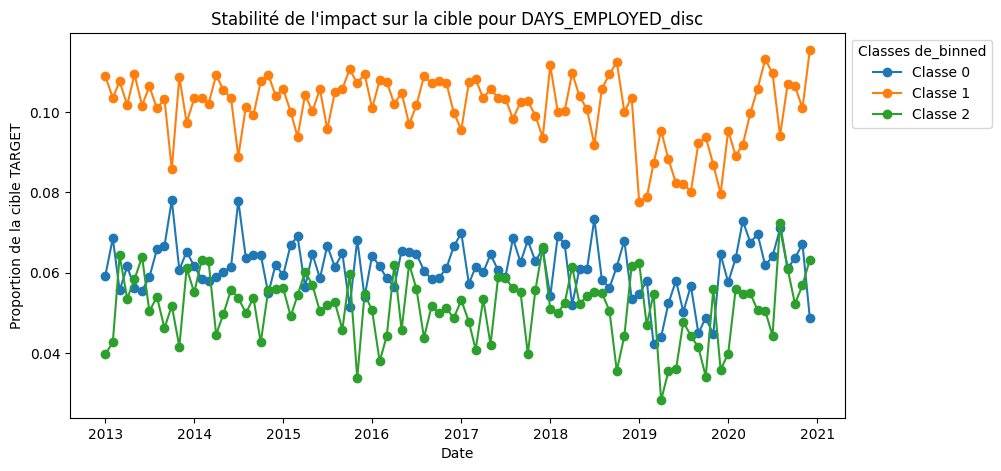

EXT_SOURCE_2
gen	nevals
0  	100   
1  	54    
2  	62    
3  	54    
4  	55    
5  	60    


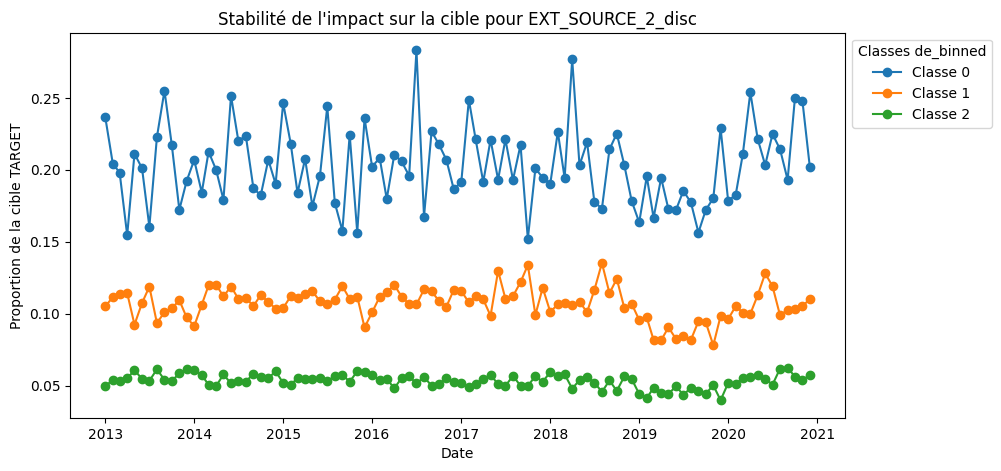

EXT_SOURCE_3
gen	nevals
0  	100   
1  	52    
2  	53    
3  	59    
4  	57    
5  	49    


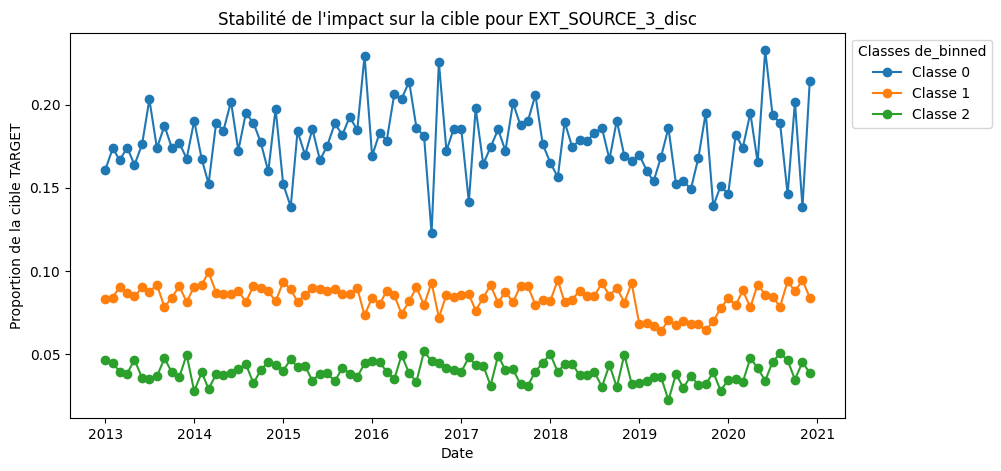

AMT_CREDIT_SUM
gen	nevals
0  	100   
1  	66    
2  	64    
3  	58    
4  	58    
5  	64    


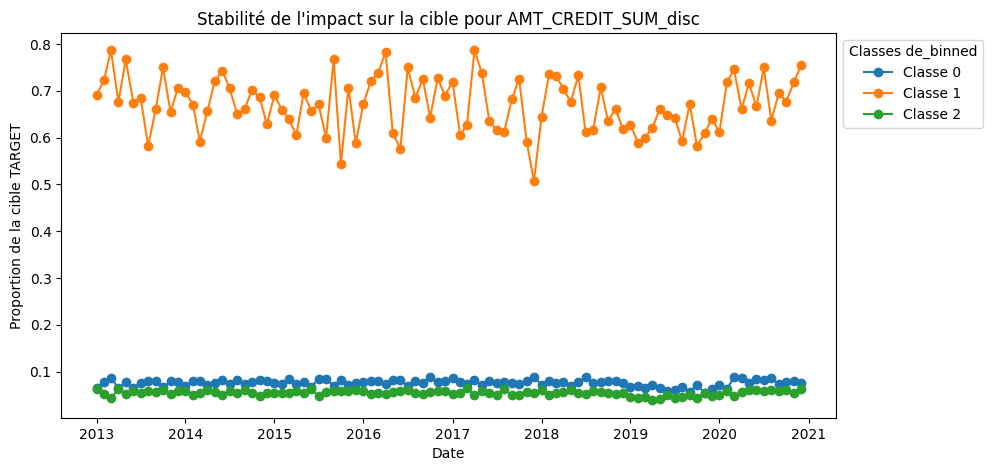

AMT_CREDIT_SUM_DEBT
gen	nevals
0  	100   
1  	57    
2  	62    
3  	67    
4  	56    
5  	58    


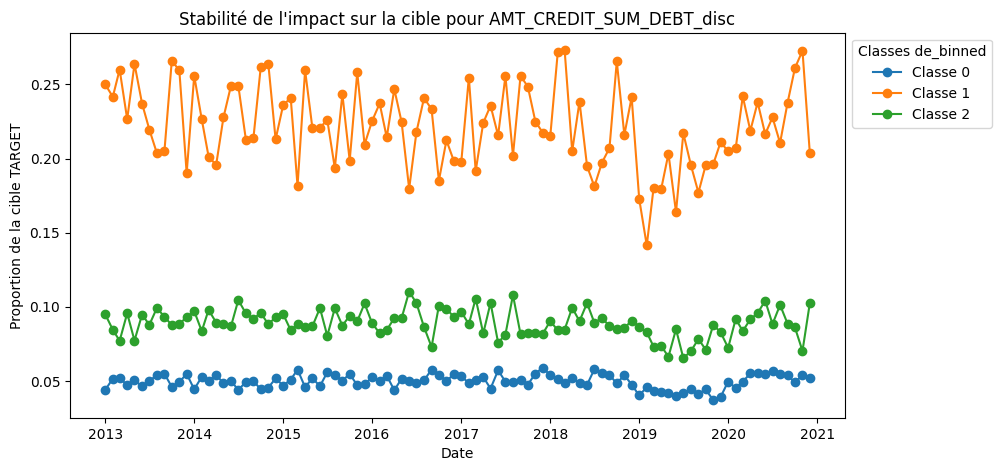

AMT_CREDIT_SUM_LIMIT
gen	nevals
0  	100   
1  	60    
2  	61    
3  	56    
4  	44    
5  	57    


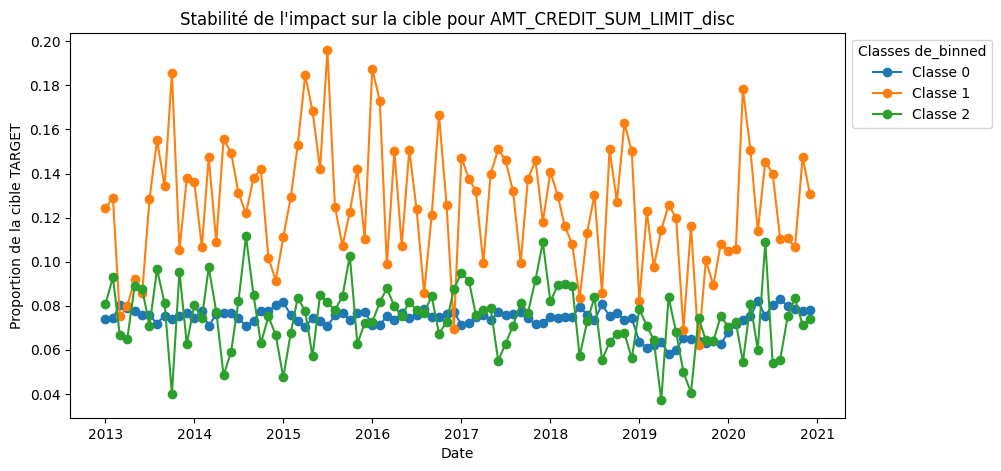

AMT_CREDIT_SUM_OVERDUE
gen	nevals
0  	100   
1  	59    
2  	65    
3  	60    
4  	59    
5  	70    


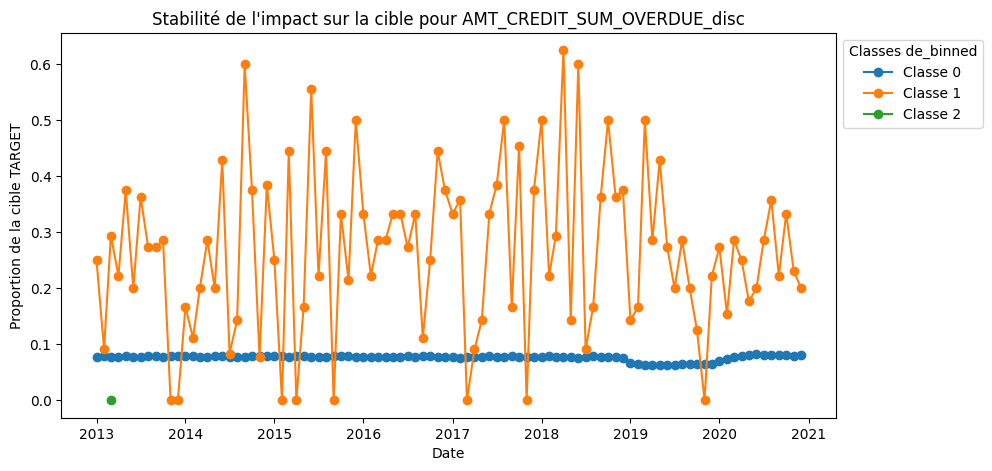

CNT_INSTALMENT_FUTURE
gen	nevals
0  	100   
1  	60    
2  	70    
3  	57    
4  	54    
5  	53    


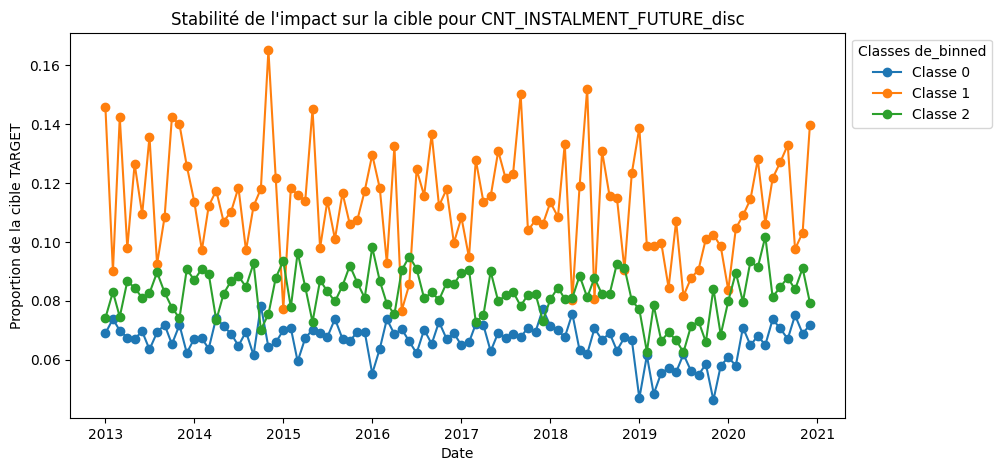

AMT_APPLICATION
gen	nevals
0  	100   
1  	59    
2  	61    
3  	63    
4  	60    
5  	64    


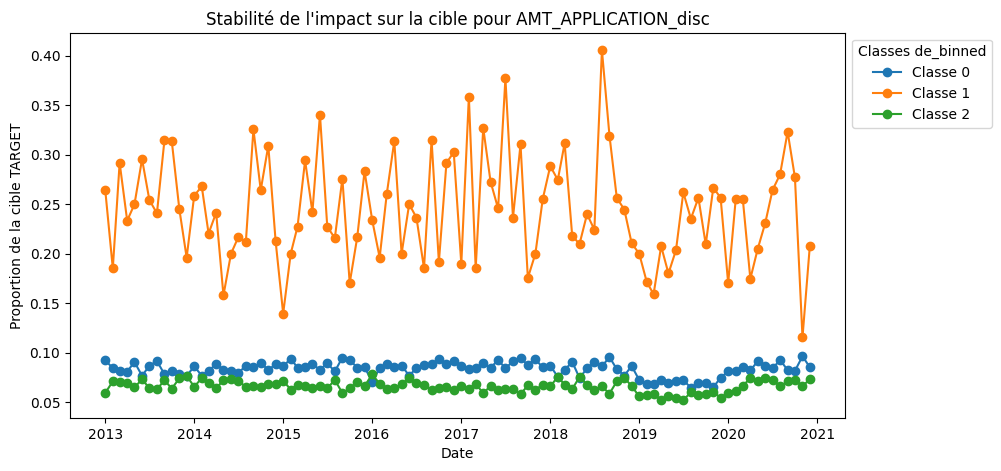

AMT_PAYMENT
gen	nevals
0  	100   
1  	48    
2  	59    
3  	61    
4  	65    
5  	69    


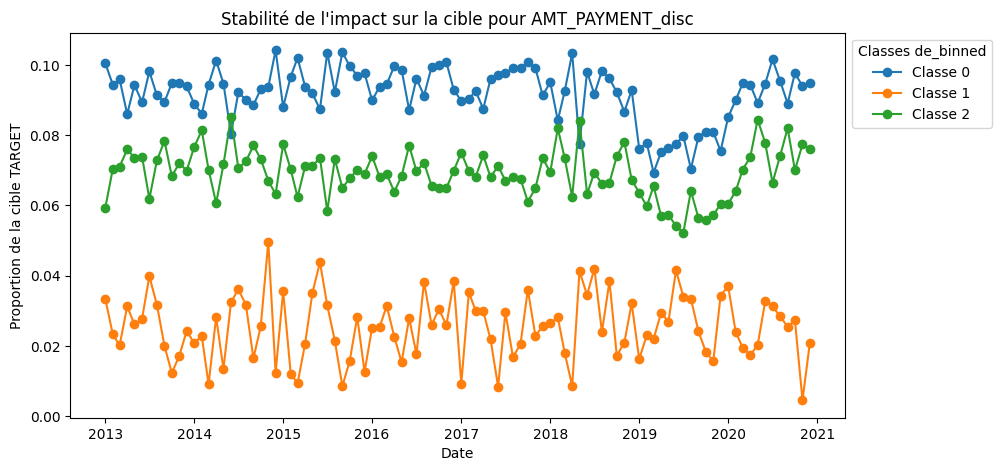

In [80]:
plot_graphes(dict_variables)

In [81]:
data.drop(["AMT_CREDIT_SUM_OVERDUE", "AMT_CREDIT_SUM_OVERDUE_disc"], axis=1, inplace=True)

### Discrétisation avec 2 bins

In [82]:
vars_a_tester_avec_2_mods =["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY","DAYS_EMPLOYED" ,"AMT_CREDIT_SUM_LIMIT",
                            "AMT_CREDIT_SUM" ]

dict_variables_2 = selection_nb_bins(nums=vars_a_tester_avec_2_mods, NB_BINS=1)

AMT_INCOME_TOTAL
gen	nevals
0  	100   
1  	66    
2  	55    
3  	58    
4  	60    
5  	58    


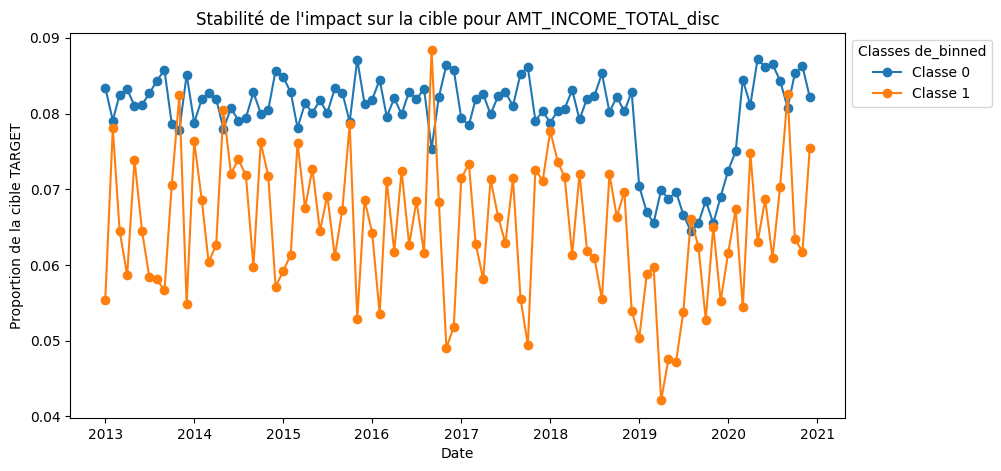

AMT_CREDIT
gen	nevals
0  	100   
1  	53    
2  	68    
3  	54    
4  	70    
5  	65    


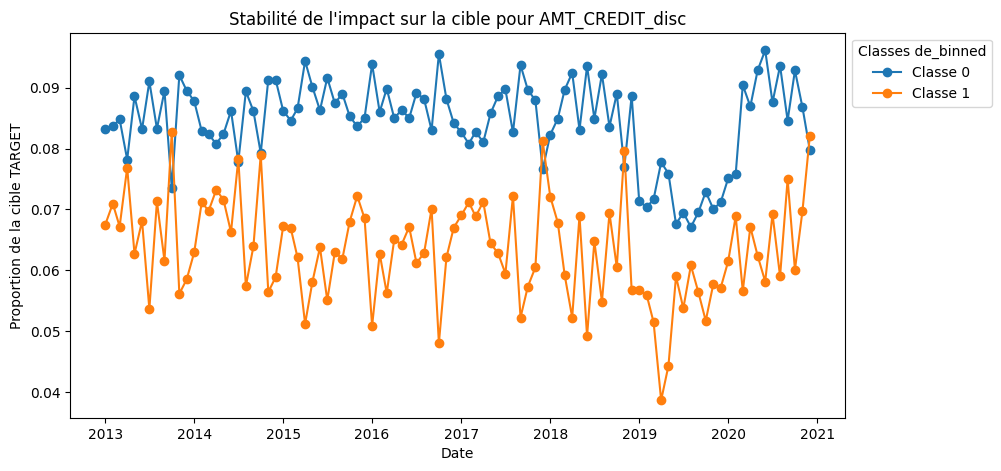

AMT_ANNUITY
gen	nevals
0  	100   
1  	64    
2  	63    
3  	57    
4  	58    
5  	65    


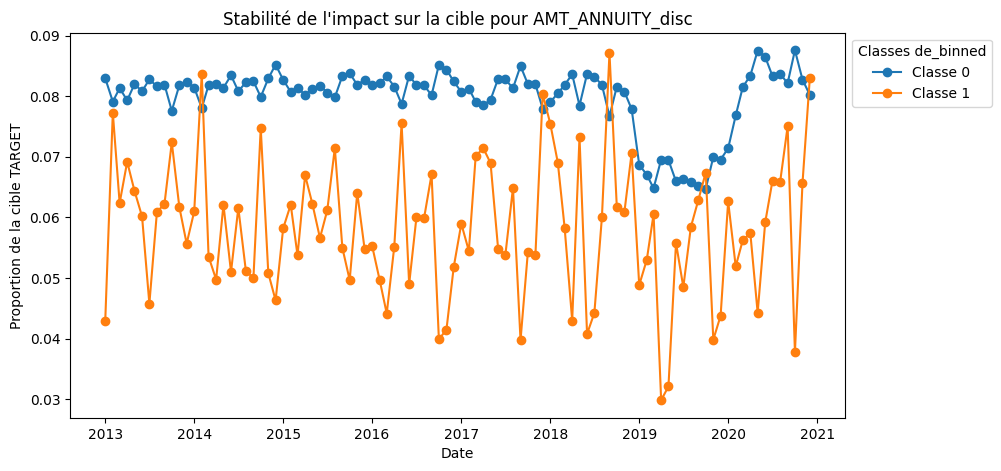

DAYS_EMPLOYED
gen	nevals
0  	100   
1  	65    
2  	59    
3  	51    
4  	65    
5  	58    


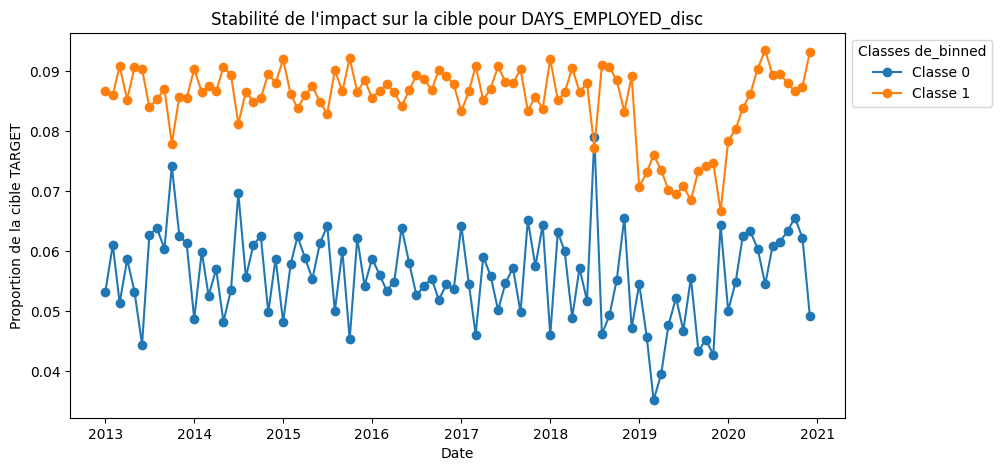

AMT_CREDIT_SUM_LIMIT
gen	nevals
0  	100   
1  	57    
2  	61    
3  	61    
4  	66    
5  	60    


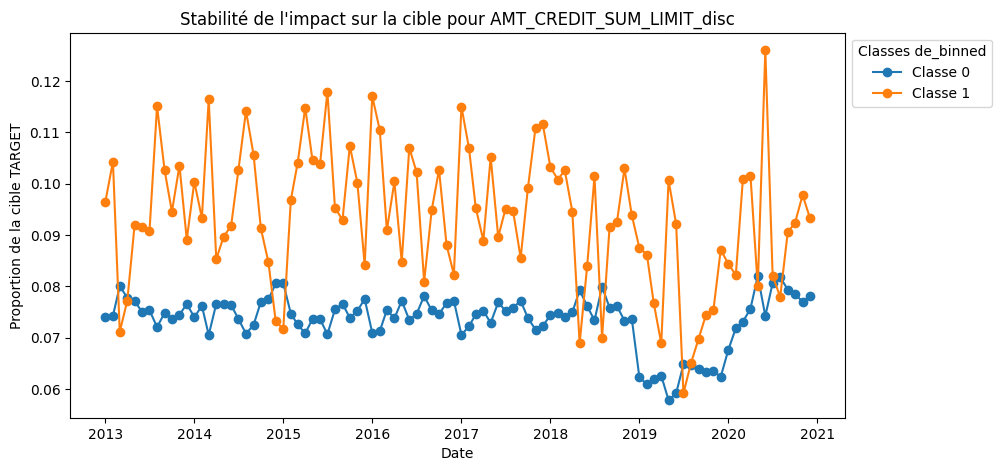

AMT_CREDIT_SUM
gen	nevals
0  	100   
1  	62    
2  	63    
3  	48    
4  	57    
5  	62    


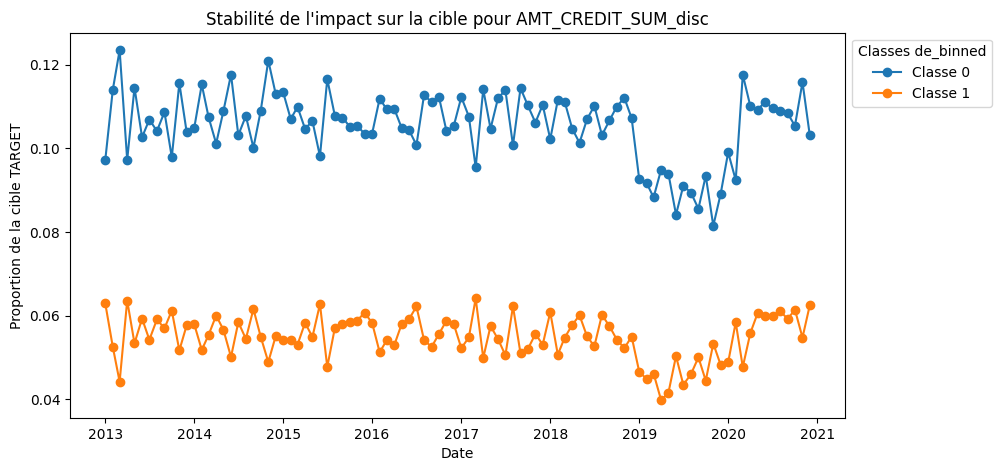

In [83]:
plot_graphes(dict_variables_2)

### Variables à tester trimestriellement

In [84]:
vars_a_tester_trimestrielle = ["CNT_INSTALMENT_FUTURE_disc","AMT_APPLICATION_disc","AMT_PAYMENT_disc",
                               "AMT_INCOME_TOTAL_disc", "AMT_CREDIT_disc", "AMT_ANNUITY_disc","DAYS_EMPLOYED_disc",
                               "AMT_CREDIT_SUM_disc"]

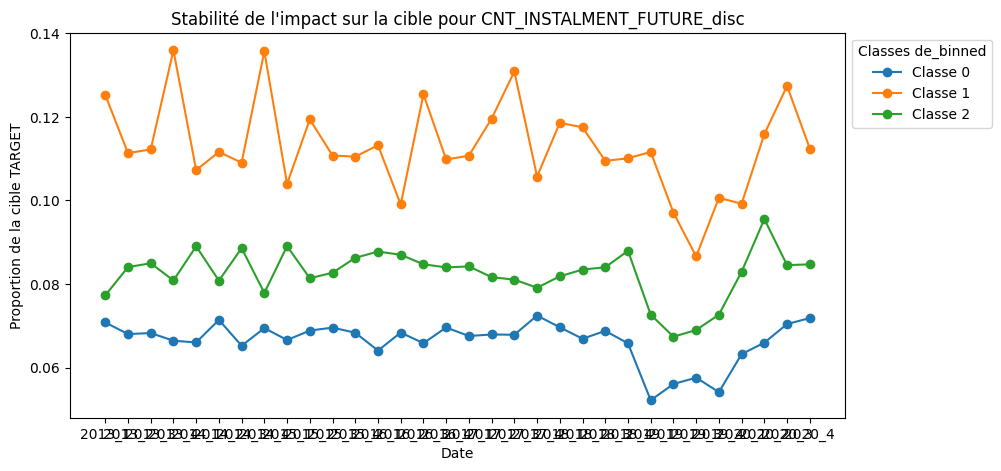

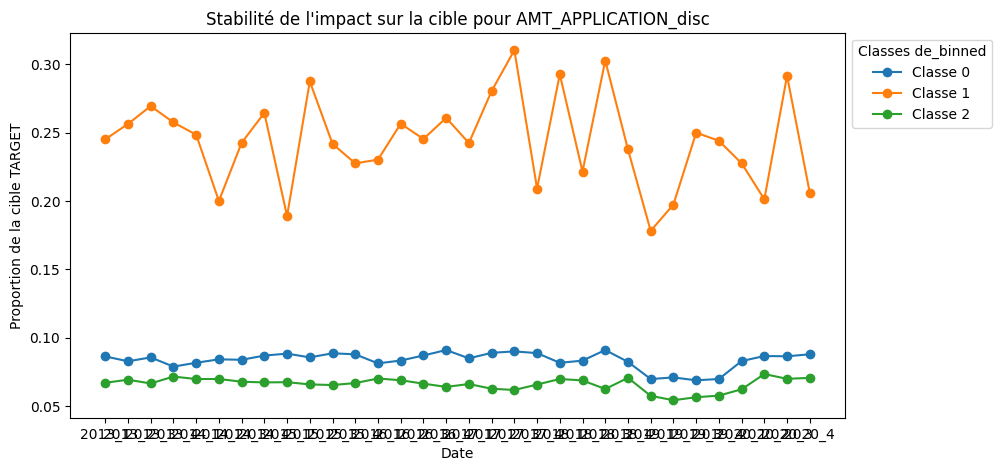

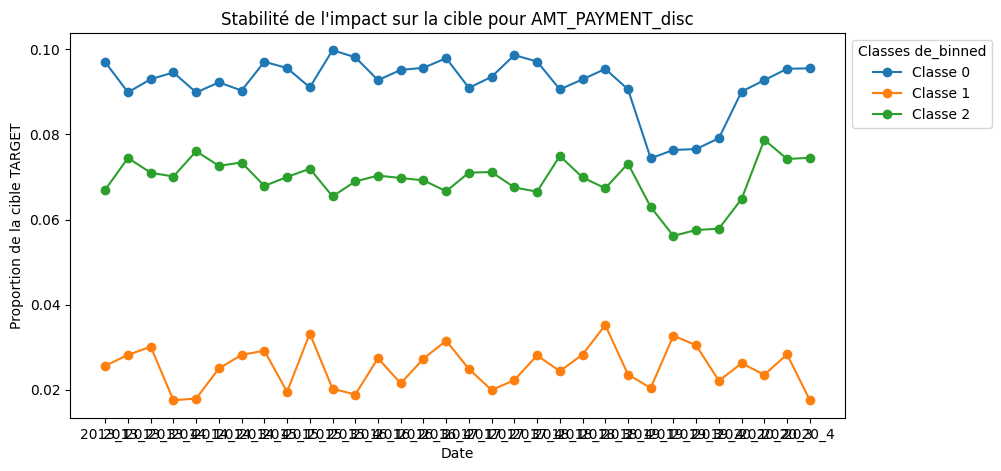

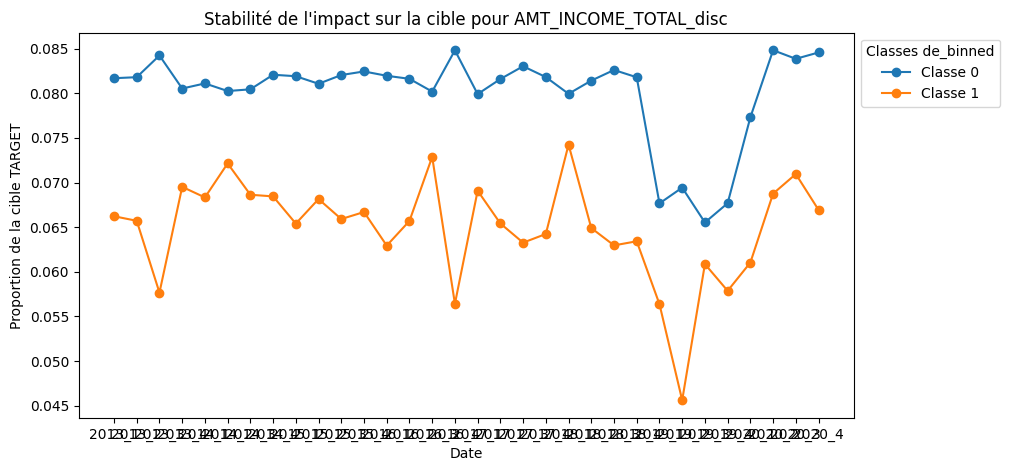

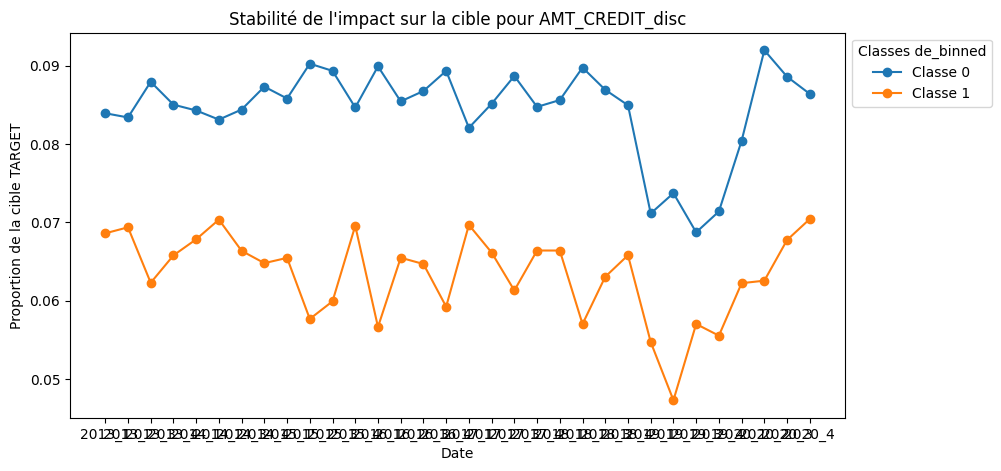

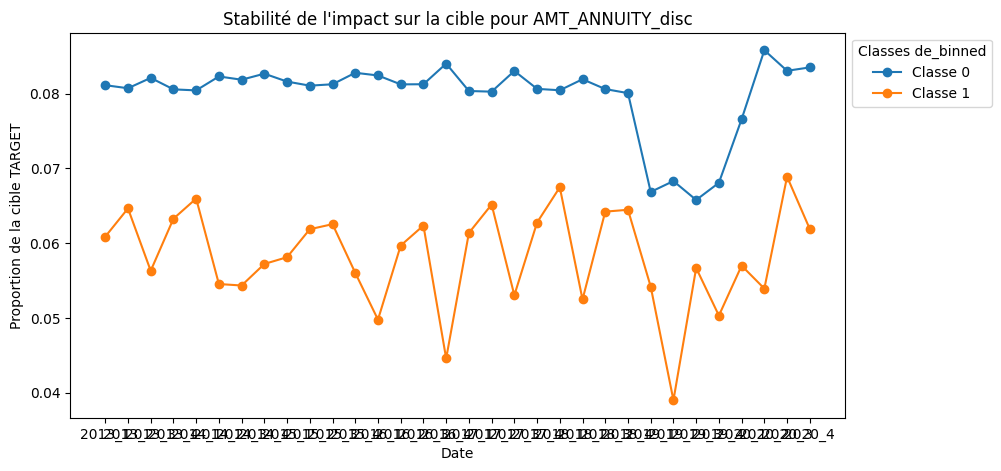

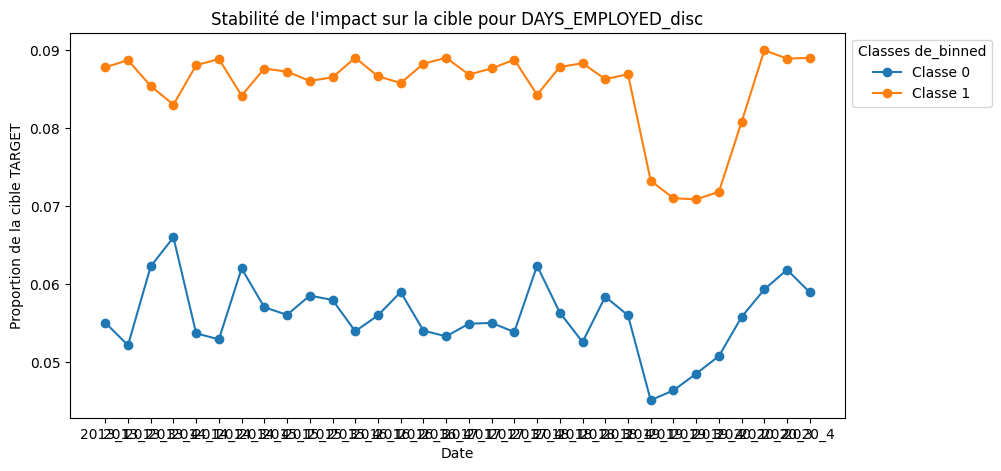

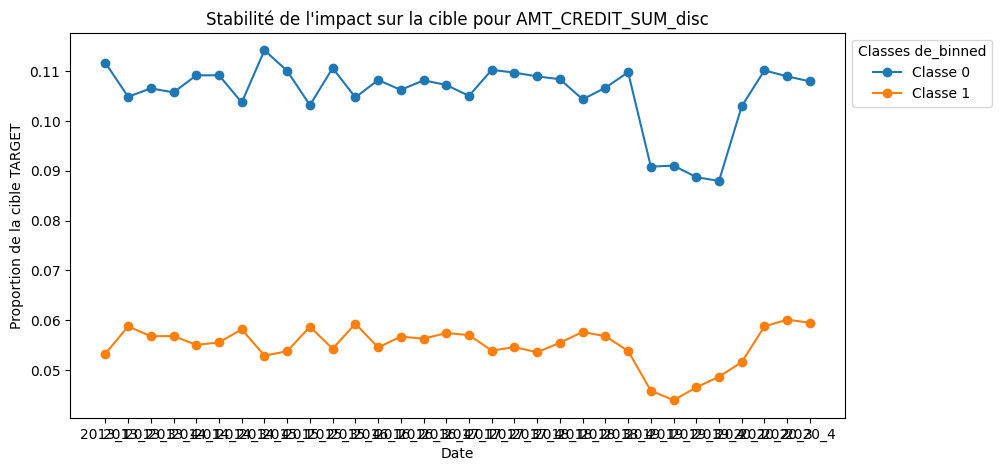

In [87]:
data['date_trimestrielle'] = data['date_mensuelle'].dt.year.astype(str) + '_' + data['date_mensuelle'].dt.quarter.astype(str)


def calculate_stability_tri(column):
    stability_df = data.groupby(['date_trimestrielle', column])['TARGET'].mean().unstack()

    stability_df['stability'] = stability_df.std(axis=1) / stability_df.mean(axis=1)
    return stability_df


def plot_stability_tri(variable):
    stability_df = calculate_stability_tri(variable)
    plt.figure(figsize=(10, 5))

    for class_label in stability_df.drop('stability', axis=1).columns:
        values = stability_df[class_label]
        plt.plot(stability_df.index, values, label=f'Classe {class_label}', marker='o')

    plt.title(f'Stabilité de l\'impact sur la cible pour {variable}')
    plt.xlabel('Date')
    plt.ylabel('Proportion de la cible TARGET')
    plt.legend(title=f'Classes de_binned', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

for var in vars_a_tester_trimestrielle :
    plot_stability_tri(var)

# Tri des variables

In [88]:
ong_garde = ['EXT_SOURCE_2', "EXT_SOURCE_3", "AMT_CREDIT_SUM_DEBT", "AMT_INCOME_TOTAL", "AMT_CREDIT",
             "AMT_ANNUITY", "DAYS_EMPLOYED", "AMT_CREDIT_SUM", "AMT_CREDIT_SUM_LIMIT"]

vars_cate = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE_discret',
       'NAME_EDUCATION_TYPE_discret', 'NAME_FAMILY_STATUS_discret']

vars_discretisees = [str(var+"_disc") for var in ong_garde]

toutes_vars = ["TARGET"] +["SK_ID_CURR"] +["date_mensuelle"] + vars_discretisees + vars_cate

data = data[toutes_vars]

for col in data.select_dtypes(include=np.number).columns.tolist():
    if col != "TARGET" and col != "SK_ID_CURR":
        data[col] = data[col].astype('object')

data.dtypes

TARGET                                  int64
SK_ID_CURR                              int64
date_mensuelle                 datetime64[ns]
EXT_SOURCE_2_disc                      object
EXT_SOURCE_3_disc                      object
AMT_CREDIT_SUM_DEBT_disc               object
AMT_INCOME_TOTAL_disc                  object
AMT_CREDIT_disc                        object
AMT_ANNUITY_disc                       object
DAYS_EMPLOYED_disc                     object
AMT_CREDIT_SUM_disc                    object
AMT_CREDIT_SUM_LIMIT_disc              object
NAME_CONTRACT_TYPE                     object
NAME_INCOME_TYPE_discret               object
NAME_EDUCATION_TYPE_discret            object
NAME_FAMILY_STATUS_discret             object
dtype: object

In [8]:
import pandas as pd
df = pd.read_csv('/Users/SamuelLP/Desktop/git/Challenge_Nexialog/datas/df_segmentation.csv', index_col=[0])
d = df[['REGION_RATING_CLIENT_W_CITY', 'DAYS_CREDIT_ENDDATE_disc_int', "RATE_DOWN_PAYMENT_disc_int",
         "AMT_PAYMENT_disc_int", "NAME_INCOME_TYPE_discret", "OCCUPATION_TYPE_discret", 'Score_ind', "Classes"]]
d

REGION_RATING_CLIENT_W_CITY DAYS_CREDIT_ENDDATE_disc_int  \
0                            trois             [-31.0;214193.0]   
1                            trois            [-155271.0;-32.0]   
2                          un_deux             [-31.0;214193.0]   
3                          un_deux            [-155271.0;-32.0]   
4                          un_deux             [-31.0;214193.0]   
...                            ...                          ...   
306102                       trois             [-31.0;214193.0]   
306103                     un_deux            [-155271.0;-32.0]   
306104                     un_deux             [-31.0;214193.0]   
306105                       trois             [-31.0;214193.0]   
306106                     un_deux             [-31.0;214193.0]   

       RATE_DOWN_PAYMENT_disc_int     AMT_PAYMENT_disc_int  \
0                     [-0.0;0.21]  [143892.94;25537053.78]   
1                     [-0.0;0.21]  [143892.94;25537053.78]   
2                     [-0.0;0.21]           [0.0;143891.1]   
3                     [-0.0;0.21]           [0.0;143891.1]   
4                     [-0.0;0.21]           [0.0;143891.1]   
...                           ...                      ...   
306102                [-0.0;0.21]           [0.0;143891.1]   
306103                [0.21;4.48]  [143892.94;25537053.78]   
306104                [-0.0;0.21]           [0.0;143891.1]   
306105                [-0.0;0.21]           [0.0;143891.1]   
306106                [-0.0;0.21]           [0.0;143891.1]   

       NAME_INCOME_TYPE_discret OCCUPATION_TYPE_discret   Score_ind  Classes  
0                   high_income             low_skilled  671.309192        5  
1                   high_income             low_skilled  832.869081        6  
2                   high_income             low_skilled  537.604457        4  
3                   high_income             low_skilled  626.740947        4  
4                   high_income             low_skilled  320.334262        2  
...                         ...                     ...         ...      ...  
306102               Low_income             low_skilled  523.676880        4  
306103              high_income             low_skilled  832.869081        6  
306104              high_income             low_skilled  643.454039        5  
306105               Low_income             low_skilled  568.245125        4  
306106              high_income             low_skilled  440.111421        3  

[306107 rows x 8 columns]

In [4]:
df

date_mensuelle  TARGET DAYS_CREDIT_ENDDATE_disc_int  \
0          2013-01-01       0             [-31.0;214193.0]   
1          2013-01-01       0            [-155271.0;-32.0]   
2          2013-01-01       0             [-31.0;214193.0]   
3          2013-01-01       0            [-155271.0;-32.0]   
4          2013-01-01       0             [-31.0;214193.0]   
...               ...     ...                          ...   
306102     2020-12-01       0             [-31.0;214193.0]   
306103     2020-12-01       0            [-155271.0;-32.0]   
306104     2020-12-01       0             [-31.0;214193.0]   
306105     2020-12-01       0             [-31.0;214193.0]   
306106     2020-12-01       1             [-31.0;214193.0]   

       DAYS_FIRST_DRAWING_disc_int RATE_DOWN_PAYMENT_disc_int  \
0             [730486.0;9131075.0]                [-0.0;0.21]   
1             [730486.0;9131075.0]                [-0.0;0.21]   
2               [-3505.0;730484.0]                [-0.0;0.21]   
3               [-3505.0;730484.0]                [-0.0;0.21]   
4               [-3505.0;730484.0]                [-0.0;0.21]   
...                            ...                        ...   
306102          [-3505.0;730484.0]                [-0.0;0.21]   
306103        [730486.0;9131075.0]                [0.21;4.48]   
306104          [-3505.0;730484.0]                [-0.0;0.21]   
306105          [-3505.0;730484.0]                [-0.0;0.21]   
306106          [-3505.0;730484.0]                [-0.0;0.21]   

           AMT_PAYMENT_disc_int    AMT_CREDIT_SUM_disc_int  \
0       [143892.94;25537053.78]  [1024749.0;1017957917.38]   
1       [143892.94;25537053.78]            [0.0;1024735.5]   
2                [0.0;143891.1]            [0.0;1024735.5]   
3                [0.0;143891.1]            [0.0;1024735.5]   
4                [0.0;143891.1]            [0.0;1024735.5]   
...                         ...                        ...   
306102           [0.0;143891.1]  [1024749.0;1017957917.38]   
306103  [143892.94;25537053.78]            [0.0;1024735.5]   
306104           [0.0;143891.1]            [0.0;1024735.5]   
306105           [0.0;143891.1]            [0.0;1024735.5]   
306106           [0.0;143891.1]  [1024749.0;1017957917.38]   

       AMT_CREDIT_SUM_DEBT_disc_int DAYS_EMPLOYED_disc_int  \
0            [14643.0;334498331.21]         [-2423;365243]   
1             [-6981558.21;14638.5]         [-17912;-2424]   
2            [14643.0;334498331.21]         [-2423;365243]   
3             [-6981558.21;14638.5]         [-2423;365243]   
4             [-6981558.21;14638.5]         [-2423;365243]   
...                             ...                    ...   
306102       [14643.0;334498331.21]         [-2423;365243]   
306103        [-6981558.21;14638.5]         [-17912;-2424]   
306104       [14643.0;334498331.21]         [-2423;365243]   
306105       [14643.0;334498331.21]         [-2423;365243]   
306106       [14643.0;334498331.21]         [-2423;365243]   

       EXT_SOURCE_3_disc_int  ... FLAG_WORK_PHONE FLAG_PHONE  \
0                 [0.32;0.9]  ...            zero         un   
1                 [0.32;0.9]  ...            zero         un   
2                 [0.32;0.9]  ...              un       zero   
3                 [0.32;0.9]  ...            zero       zero   
4                 [0.32;0.9]  ...            zero         un   
...                      ...  ...             ...        ...   
306102            [0.32;0.9]  ...            zero       zero   
306103            [0.32;0.9]  ...            zero       zero   
306104            [0.32;0.9]  ...            zero         un   
306105            [0.32;0.9]  ...            zero       zero   
306106            [0.0;0.32]  ...              un       zero   

       LIVE_CITY_NOT_WORK_CITY NAME_CONTRACT_TYPE FLAG_OWN_CAR  \
0                         zero         Cash loans            Y   
1                         zero         Cash loans            N   
2                       